<a href="https://colab.research.google.com/github/AlexeyTri/DL_HSE/blob/main/DL_seminar_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
a = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
], dtype=torch.float16)
a

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float16)

In [ ]:
type(a)

torch.Tensor

In [ ]:
a.dtype

torch.float16

In [ ]:
a = torch.randn(3, 4)
a

tensor([[-0.3398, -0.0950,  1.6260, -1.8649],
        [ 0.6572,  0.7548,  0.4294, -0.6261],
        [ 1.1535, -0.6050, -0.9054, -0.1503]])

In [ ]:
a.shape

torch.Size([3, 4])

In [ ]:
b = torch.rand(3, 4)
b

tensor([[0.5950, 0.6613, 0.2369, 0.4959],
        [0.3892, 0.2089, 0.8794, 0.0487],
        [0.3155, 0.2532, 0.2157, 0.4078]])

In [ ]:
a + b

tensor([[ 0.2552,  0.5663,  1.8629, -1.3690],
        [ 1.0464,  0.9637,  1.3088, -0.5775],
        [ 1.4690, -0.3518, -0.6897,  0.2575]])

In [ ]:
a * b

tensor([[-0.2022, -0.0628,  0.3852, -0.9248],
        [ 0.2558,  0.1577,  0.3776, -0.0305],
        [ 0.3639, -0.1532, -0.1953, -0.0613]])

In [ ]:
torch.sin(a) / torch.exp(b)

tensor([[-0.1838, -0.0490,  0.7879, -0.5829],
        [ 0.4139,  0.5560,  0.1728, -0.5582],
        [ 0.6668, -0.4416, -0.6341, -0.0996]])

In [ ]:
a = torch.randn(5, 2)
b = torch.randn(2, 4)

In [ ]:
(a @ b).shape

torch.Size([5, 4])

In [ ]:
a = torch.randn(5, requires_grad=True)
a

tensor([-0.2471,  1.4925, -1.1152, -0.0602,  0.1761], requires_grad=True)

In [ ]:
l = (a ** 2).sum()
l

tensor(3.5670, grad_fn=<SumBackward0>)

In [ ]:
l.shape

torch.Size([])

In [ ]:
l.backward()

In [ ]:
a.grad

tensor([-0.9883,  5.9702, -4.4607, -0.2406,  0.7046])

In [ ]:
a = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, 3, requires_grad=False)
c = torch.randn(2, 3, requires_grad=True)

In [ ]:
loss = (torch.cos(a / 3) + torch.sqrt(torch.abs(b * c))).sum(dim=0).prod(dim=0)
loss

tensor(39.2590, grad_fn=<ProdBackward1>)

In [ ]:
loss.backward()

In [ ]:
a.grad

tensor([[-0.4042,  0.4052,  0.2151],
        [ 1.6134,  0.9258, -2.6517]])

In [ ]:
c.grad

tensor([[  -3.0521, -102.4510,   -6.2473],
        [   6.4475,    3.5821,   -9.8835]])

In [ ]:
b.grad

In [ ]:
device = torch.device('cpu')
#device = torch.device('mps')
#device

device(type='mps')

In [ ]:
A = torch.randn(10000, 10000)
B = torch.randn(10000, 10000)

In [ ]:
%%time
A @ B

CPU times: user 1min 5s, sys: 1.57 s, total: 1min 6s
Wall time: 9.92 s


tensor([[  85.9103,  142.2850, -181.9633,  ...,   39.8290,   50.2794,
          -18.4557],
        [  -1.2432,  -16.7778,   29.4107,  ...,  121.7980,  141.7350,
          -91.9905],
        [ 132.5496, -125.1536, -133.9395,  ...,  -88.2162, -162.9181,
          -40.5410],
        ...,
        [ -79.1834,  164.0332,   83.1497,  ...,  -46.4447,  -17.2977,
          -73.7036],
        [ -31.9492, -152.0621,  123.9805,  ...,    3.6658,   30.3147,
          -34.0739],
        [  71.8517,   -0.7742,  -68.8635,  ...,   18.9705,   76.1999,
          139.4532]])

In [ ]:
A = A.to(device)
B = B.to(device)

In [ ]:
%%time
A @ B

CPU times: user 20.5 ms, sys: 62.5 ms, total: 83 ms
Wall time: 263 ms


/Users/isadrtdinov/opt/anaconda3/envs/based/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646991213/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


tensor([[  85.9103,  142.2846, -181.9630,  ...,   39.8290,   50.2792,
          -18.4556],
        [  -1.2431,  -16.7779,   29.4107,  ...,  121.7981,  141.7347,
          -91.9905],
        [ 132.5495, -125.1537, -133.9396,  ...,  -88.2162, -162.9179,
          -40.5413],
        ...,
        [ -79.1836,  164.0331,   83.1499,  ...,  -46.4445,  -17.2978,
          -73.7037],
        [ -31.9492, -152.0623,  123.9802,  ...,    3.6658,   30.3147,
          -34.0738],
        [  71.8518,   -0.7743,  -68.8636,  ...,   18.9705,   76.2001,
          139.4531]], device='mps:0')

In [ ]:
!ls /Users/isadrtdinov/datasets/

cifar10 mnist


In [ ]:
from torchvision.datasets import MNIST

In [ ]:
train_set = MNIST(root='~/datasets/mnist', train=True, download=True)
test_set = MNIST(root='~/datasets/mnist', train=False, download=True)

In [ ]:
len(train_set)

60000

In [ ]:
out = train_set[12675]

In [ ]:
out

(<PIL.Image.Image image mode=L size=28x28>, 4)

In [ ]:
train_set.data.shape

torch.Size([60000, 28, 28])

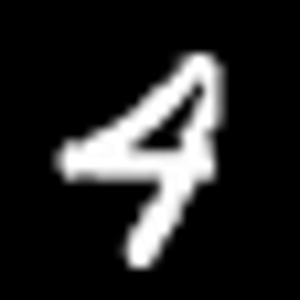

In [ ]:
out[0].resize((300, 300))

In [ ]:
torch.from_numpy?

In [ ]:
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [ ]:
transform = T.Compose([
    T.ToTensor(),
    T.Resize(32),
])

In [ ]:
train_set = MNIST(root='~/datasets/mnist', transform=transform, train=True, download=True)
test_set = MNIST(root='~/datasets/mnist', transform=transform, train=False, download=True)

In [ ]:
out = train_set[12675]

In [ ]:
out

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 4)

In [ ]:
out[0].shape

torch.Size([1, 32, 32])

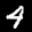

In [ ]:
to_image = T.ToPILImage()
to_image(out[0])

In [ ]:
DataLoader?

In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [ ]:
for batch in train_loader:
    break

In [ ]:
batch[0].shape

torch.Size([64, 1, 32, 32])

In [ ]:
batch[1].shape

torch.Size([64])

In [ ]:
for images, labels in train_loader:
    # Шаг градиентного спуска
    print(images.shape, labels.shape)

torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size

torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size

torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size([64, 1, 32, 32]) torch.Size([64])
torch.Size